In [11]:
import snewpy.models
import snewpy.flavor_transformation
import numpy as np
from astropy import units as u

import pylab as plt

In [52]:
from snewpy.neutrino import Flavor

In [98]:
plt.rc('grid',ls=':')
plt.rc('axes',grid=True)
plt.rc('legend',fontsize=16,loc='upper right')

In [118]:
def plot_flavors(x,y, xlabel='x', ylabel='y'):
    """
    Plot spectra nicely
    Parameters
    ----------
    x: astropy.Quantity 
        Common x values for all flavors
    y: dictionary of {flavor:astropy.Quantity}
        Dictionary of Y values for each flavor to plot
    xlabel: str
        Label for X axis
    ylabel: str
        Label for y axis
    """
    styles = {f: dict(color='C0' if f.is_electron else 'C1',
                        ls='-' if f.is_neutrino else ':',
                        label=f.to_tex()) for f in Flavor}
    for f in y:
        plt.plot(x,y[f],**styles[f])
    plt.legend(ncol=2)
    plt.xlabel(f'{xlabel} [{x.unit}]')
    plt.ylabel(f'{ylabel} [{y[f].unit}]')
    plt.autoscale(tight=True,axis='x')

    

In [121]:
model = snewpy.models.presn.Odrzywolek_2010('models/presn-models/models/Odrzywolek/s15_nuebar_data.txt')

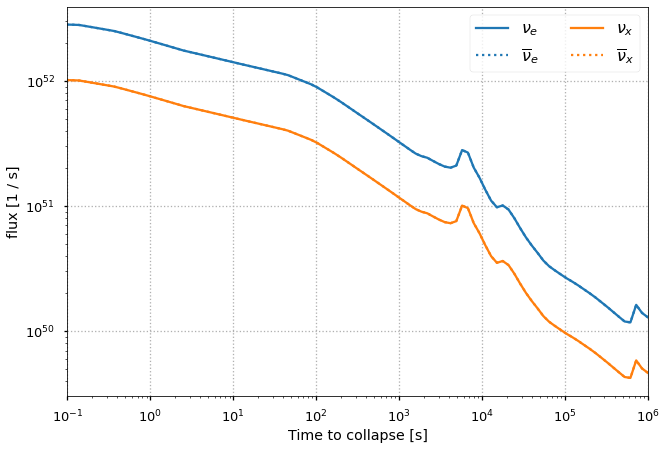

In [122]:
#calculate total neutrino event rates per second
E = np.linspace(0,20,201) * u.MeV #energy points for integration
t = np.geomspace(-1e6,-1e-1,101) * u.s

ispec = model.get_initial_spectra(t, E)

nu_rate = {f: np.trapz(spec,x=E,axis=0) for f,spec in ispec.items()}

plot_flavors(x=-t,xlabel='Time to collapse',y=nu_rate,ylabel='flux')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [123]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = snewpy.flavor_transformation.AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,20,201) * u.MeV
t = -1*u.s

ispec = model.get_initial_spectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

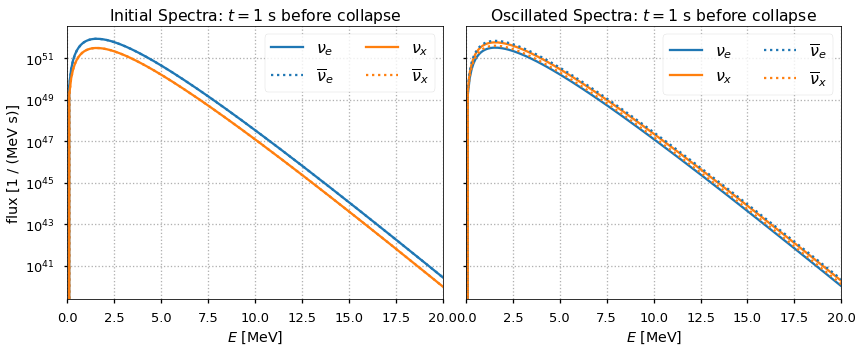

In [124]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for ax,spec,label in zip(axes,[ispec, ospec_nmo],['Initial','Oscillated']):
    plt.sca(ax)
    plot_flavors(E,spec,xlabel='$E$',ylabel='flux')
    plt.title(f'{label} Spectra: $t = ${-t:.1g} before collapse')
    plt.grid(ls=':')
    plt.legend(loc='upper right', ncol=2, fontsize=16)
    plt.yscale('log')
axes[1].set_ylabel(None)
plt.show()